# 1. 기본 설정

In [38]:
# !pip install graphviz

In [39]:
# import os
# os.environ["PATH"] += os.pathsep + r'/Users/jiyoung/anaconda3/pkgs/graphviz-2.38.0-4/bin'

In [40]:
import pandas as pd
import numpy as np
import missingno as msno
import sys 

from plotnine import * 

In [41]:
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeClassifier

# export_graphviz(model,
#                 feature_names = feaure_names,
#                 class_names = ['Perish', 'Survived'],
#                 out_file = "decision=tree.dot")
# with open('decision-tree-dot') as f:
#     dot_graph = f.read()

In [42]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [45]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2. 결측치 확인

In [46]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

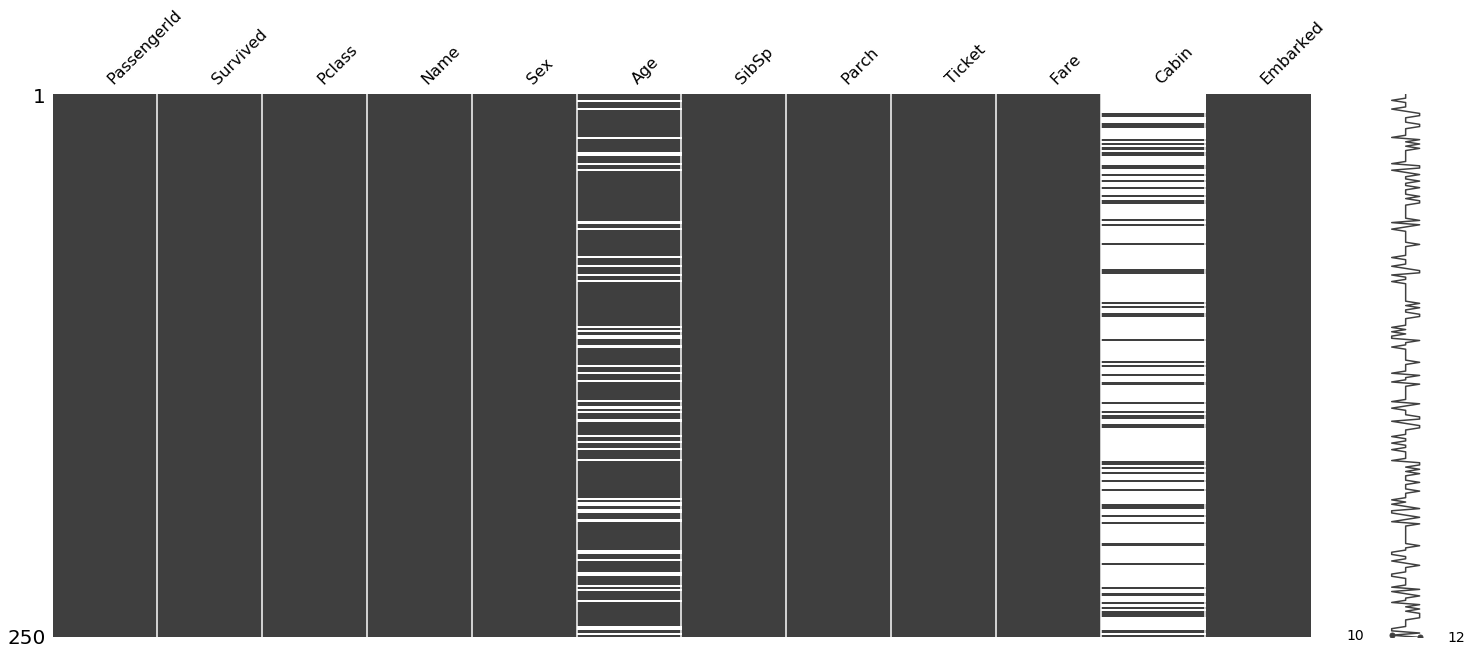

In [48]:
# 결측치 시각화
%matplotlib inline
train = train.replace('nan', np.nan)
msno.matrix(train.sample(250))

# 3. 결측치 채워주기

In [49]:
train_mean = train.copy(deep = True)
test_mean = test.copy(deep = True)

train_mean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
def data_fillna(dataset):
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    dataset['TicketNumber'].fillna(dataset['TicketNumber'].mode()[0], inplace = True)

In [60]:
# str은 series를 vectorized
# astype()은 데이터가 숫자 형식일때 '다른' 숫자 형식으로 바꿀 수 있음
# float > int
# apply()는 str 형식인 데이터를 숫자 형식으로 바꿔줌. (xxx > nan)

train_mean['TicketNumber'] = train['Ticket'].str.extract('(\d{2,})', 
                             expand = True)
train_mean['TicketNumber'] = train_mean['TicketNumber'].apply(pd.to_numeric)

test_mean['TicketNumber'] = test['Ticket'].str.extract('(\d{2,})',
                            expand = True)
test_mean['TicketNumber'] = test_mean['TicketNumber'].apply(pd.to_numeric)



In [61]:
data_fillna(train_mean)
data_fillna(test_mean)

In [311]:
test['Age'].fillna(test['Age'].mean(), inplace = False)

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
5      14.00000
6      30.00000
7      26.00000
8      18.00000
9      21.00000
10     30.27259
11     46.00000
12     23.00000
13     63.00000
14     47.00000
15     24.00000
16     35.00000
17     21.00000
18     27.00000
19     45.00000
20     55.00000
21      9.00000
22     30.27259
23     21.00000
24     48.00000
25     50.00000
26     22.00000
27     22.50000
28     41.00000
29     30.27259
         ...   
388    21.00000
389     6.00000
390    23.00000
391    51.00000
392    13.00000
393    47.00000
394    29.00000
395    18.00000
396    24.00000
397    48.00000
398    22.00000
399    31.00000
400    30.00000
401    38.00000
402    22.00000
403    17.00000
404    43.00000
405    20.00000
406    23.00000
407    50.00000
408    30.27259
409     3.00000
410    30.27259
411    37.00000
412    28.00000
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, 

In [312]:
train['Age_mean'] = train['Age'].fillna(train['Age'].mean(), inplace = False)
train['Age_mean'].mean()

# inplace = True, ['Age']를 대체해라..?
# inplace = False, ['Age']는 그대로 둬라

29.699117647058763

In [313]:
test['Age_mean'] = test['Age'].fillna(test['Age'].mean())
test['Age_mean'].mean()

30.272590361445815

In [314]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_mean         0
dtype: int64

In [315]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


# One-Hot-Encoding

In [316]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [317]:
# 여기서는 괄호를 치고 안치고 상관없음. 다만 연산자 and,or가 들어갈 경우 반드시 괄호.
train['Gender'] = (train['Sex'] == 'female')
train['Gender'].head()

0    False
1     True
2     True
3     True
4    False
Name: Gender, dtype: bool

In [318]:
test['Sex'].value_counts()
test['Gender'] = (test['Sex'] == 'female')
test['Gender'].head()

0    False
1     True
2    False
3    False
4     True
Name: Gender, dtype: bool

In [319]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [320]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [321]:
test['Embarked'].isnull().sum()

0

In [322]:
train['Embarked_S'] = train['Embarked'] == 'S'
train['Embarked_C'] = train['Embarked'] == 'C'
train['Embarked_Q'] = train['Embarked'] == 'Q'

train['Embarked_S'].head()

0     True
1    False
2     True
3     True
4     True
Name: Embarked_S, dtype: bool

In [323]:
train['Embarked_S'].sum()

644

In [324]:
train['Embarked_C'].sum()

168

In [325]:
train['Embarked_Q'].sum()

77

In [326]:
train[['Embarked', 'Embarked_S', 'Embarked_C', 'Embarked_Q']].head()

,Embarked,Embarked_S,Embarked_C,Embarked_Q
0,S,True,False,False
1,C,False,True,False
2,S,True,False,False
3,S,True,False,False
4,S,True,False,False


In [327]:
test['Embarked_S'] = test['Embarked'] == 'S'
test['Embarked_C'] = test['Embarked'] == 'C'
test['Embarked_Q'] = test['Embarked'] == 'Q'

test['Embarked_S'].head()

0    False
1     True
2    False
3     True
4     True
Name: Embarked_S, dtype: bool

In [328]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_mean', 'Gender',
       'Embarked_S', 'Embarked_C', 'Embarked_Q'],
      dtype='object')

In [329]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

# Binning을 해봅시다.

In [330]:
# Family를 S(Small), M(medium), Large(L)로 범위를 축소시킴.
# 그대로 FamilySize를 사용하면 overfitting될 수 있어서. 
# Desision tree의 조건(뻗어나가는 가지)을 최대한 적게하는 것이 효율적입니다.


train['Family'] = train['FamilySize']
train.loc[train['FamilySize'] == 1, 'Family'] = 'S'
train.loc[(train['FamilySize'] > 1) & (train['FamilySize'] < 5), 'Family'] = 'M'
train.loc[(train['FamilySize'] > 4) , 'Family'] = 'L'
train[['Family', 'FamilySize']].head()

,Family,FamilySize
0,M,2
1,M,2
2,S,1
3,M,2
4,S,1


In [331]:
train['Family_S'] = train['Family'] == 'S'
train['Family_M'] = train['Family'] == 'M'
train['Family_L'] = train['Family'] == 'L'
train[['FamilySize', 'Family', 'Family_S', 'Family_M', 'Family_L']].head()

,FamilySize,Family,Family_S,Family_M,Family_L
0,2,M,False,True,False
1,2,M,False,True,False
2,1,S,True,False,False
3,2,M,False,True,False
4,1,S,True,False,False


In [332]:
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['FamilySize'].value_counts()

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: FamilySize, dtype: int64

In [333]:
test['Family'] = test['FamilySize']
test.loc[(test['FamilySize'] == 1), 'Family'] = 'S'
test.loc[(test['FamilySize'] > 1) & (test['FamilySize'] < 5), 'Family'] = 'M'
test.loc[(test['FamilySize'] > 4), 'Family'] = 'L'

In [334]:
test['Family_S'] = test['Family'] == 'S'
test['Family_M'] = test['Family'] == 'M'
test['Family_L'] = test['Family'] == 'L'

In [335]:
train['Family'].value_counts()

S    537
M    292
L     62
Name: Family, dtype: int64

In [336]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_mean', 'Gender',
       'Embarked_S', 'Embarked_C', 'Embarked_Q', 'FamilySize', 'Family',
       'Family_S', 'Family_M', 'Family_L'],
      dtype='object')

In [ ]:
trian['Pclass'] = train['']

# Feature Selection

In [368]:
feature_names = ['Gender', 'Age_mean', 
                 'Embarked_S', 'Embarked_C', 'Embarked_Q', 
                 'Family_S', 'Family_M', 'Family_L',]

In [369]:
X_train = train[feature_names]
X_train.head()

,Gender,Age_mean,Embarked_S,Embarked_C,Embarked_Q,Family_S,Family_M,Family_L
0,False,22.0,True,False,False,False,True,False
1,True,38.0,False,True,False,False,True,False
2,True,26.0,True,False,False,True,False,False
3,True,35.0,True,False,False,False,True,False
4,False,35.0,True,False,False,True,False,False


In [370]:
 # Survived로 label data를 지정합니다.
y_test = train['Survived']

In [371]:
X_test = test[feature_names]
X_test.head()

,Gender,Age_mean,Embarked_S,Embarked_C,Embarked_Q,Family_S,Family_M,Family_L
0,False,34.5,False,False,True,True,False,False
1,True,47.0,True,False,False,False,True,False
2,False,62.0,False,False,True,True,False,False
3,False,27.0,True,False,False,True,False,False
4,True,22.0,True,False,False,False,True,False


In [372]:
model = DecisionTreeClassifier(max_depth = 3, random_state = 2018, splitter='best')

In [373]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2018,
            splitter='best')

In [374]:
prediction = model.predict(X_test)
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [375]:
test['Survived'] = prediction
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_mean', 'Gender',
       'Embarked_S', 'Embarked_C', 'Embarked_Q', 'FamilySize', 'Family',
       'Family_S', 'Family_M', 'Family_L', 'Survived'],
      dtype='object')

In [376]:
submissions = test[['PassengerId', 'Survived']]
submissions.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [377]:
submissions.to_csv('submissions/submit.csv', index = False)

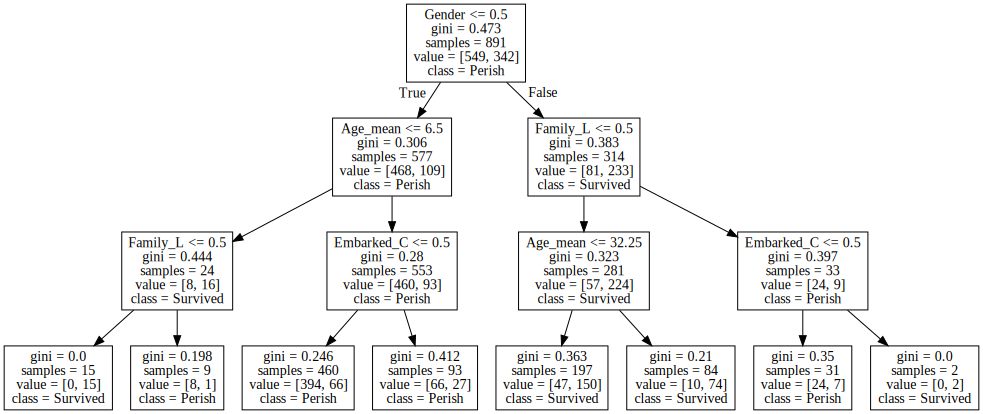

In [378]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model,
                feature_names=feature_names,
                class_names=["Perish", "Survived"],
                out_file="decision-tree.dot")

with open("decision-tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [379]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 2018)

In [380]:
scoring = 'accuracy'
score = cross_val_score(model, X_train, y_label, 
                       cv = k_fold, n_jobs = -1,
                      scoring = scoring)
print(score)

[0.83333333 0.87640449 0.87640449 0.83146067 0.84269663 0.78651685
 0.80898876 0.83146067 0.69662921 0.83146067]


In [381]:
round(np.mean(score)*100, 2)

82.15